<a href="https://colab.research.google.com/github/pranay8297/deep-learning-projects/blob/master/MnistLogisticOwn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#pip install torch==1.4.0+cu100 torchvision==0.5.0+cu100 -f https://download.pytorch.org/whl/torch_stable.html

In [1]:
from fastai import *
from fastai.vision import *

In [2]:
!wget http://deeplearning.net/data/mnist/mnist.pkl.gz

--2020-10-06 06:18:30--  http://deeplearning.net/data/mnist/mnist.pkl.gz
Resolving deeplearning.net (deeplearning.net)... 132.204.26.28
Connecting to deeplearning.net (deeplearning.net)|132.204.26.28|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16168813 (15M) [application/x-gzip]
Saving to: ‘mnist.pkl.gz’

mnist.pkl.gz        100%[===================>]  15.42M  6.32MB/s    in 2.4s    

2020-10-06 06:18:33 (6.32 MB/s) - ‘mnist.pkl.gz’ saved [16168813/16168813]



In [3]:
!ls
!pip install ipdb

from ipdb import set_trace as st

mnist.pkl.gz  sample_data
  Created wheel for ipdb: filename=ipdb-0.13.4-cp36-none-any.whl size=10973 sha256=d2c21aa25ee840aab88c12b0aaa967966310ef6a355601a28d74f03396c3e0bf
  Stored in directory: /root/.cache/pip/wheels/56/51/e4/c91c61e3481a1a967beb18c4ea7a2b138a63cce94170b2e206
Successfully built ipdb


In [4]:
import os
# os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

In [4]:
import gzip
import pickle

In [4]:
with gzip.open('mnist.pkl.gz') as fam:
  fam.seek(0)#if at all the index variable of the file is not set properly
  data = pickle.load(fam, encoding = 'latin-1 ')
  print('complete')

complete


In [55]:
!pwd
path = Path('/content')

/content


In [8]:
#test
data

((array([[0., 0., 0., 0., ..., 0., 0., 0., 0.],
         [0., 0., 0., 0., ..., 0., 0., 0., 0.],
         [0., 0., 0., 0., ..., 0., 0., 0., 0.],
         [0., 0., 0., 0., ..., 0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0., ..., 0., 0., 0., 0.],
         [0., 0., 0., 0., ..., 0., 0., 0., 0.],
         [0., 0., 0., 0., ..., 0., 0., 0., 0.],
         [0., 0., 0., 0., ..., 0., 0., 0., 0.]], dtype=float32),
  array([5, 0, 4, 1, ..., 0, 8, 4, 8])),
 (array([[0., 0., 0., 0., ..., 0., 0., 0., 0.],
         [0., 0., 0., 0., ..., 0., 0., 0., 0.],
         [0., 0., 0., 0., ..., 0., 0., 0., 0.],
         [0., 0., 0., 0., ..., 0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0., ..., 0., 0., 0., 0.],
         [0., 0., 0., 0., ..., 0., 0., 0., 0.],
         [0., 0., 0., 0., ..., 0., 0., 0., 0.],
         [0., 0., 0., 0., ..., 0., 0., 0., 0.]], dtype=float32),
  array([3, 8, 6, 9, ..., 3, 5, 6, 8])),
 (array([[0., 0., 0., 0., ..., 0., 0., 0., 0.],
         [0., 0., 0., 0., ..., 0., 0., 0

In [5]:
(x_train, y_train), (x_valid, y_valid), _ = data

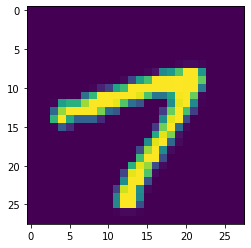

In [7]:
plt.imshow(x_train[101].reshape(28, 28))

In [8]:
#test.
x_train.shape, y_train.shape

((50000, 784), (50000,))

In [9]:
#test
len(x_train[1])/16

49.0

In [6]:
x_train, y_train, x_valid, y_valid = map(torch.Tensor, (x_train, y_train, x_valid, y_valid))
y_train, y_vald = y_train.long(), y_valid.long()
n, c = x_train.shape 

In [66]:
#test
x_valid

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [14]:
#test
x_train.cuda(), y_train.cuda(), x_valid.cuda(), y_valid.cuda()


(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0'),
 tensor([5., 0., 4.,  ..., 8., 4., 8.], device='cuda:0'),
 tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0'),
 tensor([3., 8., 6.,  ..., 5., 6., 8.], device='cuda:0'))

In [15]:
#test
x_train.shape, x_train.device, type(x_train)

(torch.Size([50000, 784]), device(type='cpu'), torch.Tensor)

In [59]:
y_train.min(), y_train.max()

(tensor(0.), tensor(9.))

In [7]:
train_ds = TensorDataset(x_train, y_train)
valid_ds = TensorDataset(x_valid, y_valid)

In [61]:
#test
train_ds.tensors

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 tensor([5., 0., 4.,  ..., 8., 4., 8.]))

In [8]:
bs = 64
data = DataBunch.create(train_ds, valid_ds, bs = bs, num_workers = 1)

In [15]:
#test
defaults.cpus
# data.classes

4

In [9]:
for i, j in data.train_dl:
  x_b, y_b = i, j
  break

In [16]:
x_b, x_b.shape

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0'),
 torch.Size([64, 784]))

In [18]:
#test
from fastai.torch_core import defaults
defaults.device

device(type='cuda', index=0)

In [20]:
#test
for a, b in data.train_dl:
  print(a, b)
  break

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0') tensor([2., 9., 9., 9., 6., 0., 7., 1., 1., 6., 9., 6., 7., 4., 5., 4., 4., 8.,
        6., 7., 0., 1., 2., 5., 1., 4., 4., 0., 0., 3., 0., 8., 5., 4., 3., 2.,
        3., 1., 6., 2., 5., 5., 4., 5., 1., 5., 3., 5., 8., 8., 0., 5., 6., 7.,
        1., 9., 9., 6., 4., 6., 0., 5., 4., 6.], device='cuda:0')


In [10]:
#test
lin = nn.Linear(784, 10, bias=True)
p = []
for i in lin.parameters():
  p.append(i)
w, b = p
w.shape, b.shape
x_b

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0')

In [ ]:
#test
x_b.shape
rand_wt = torch.rand((784, 10))
result = x_b @ rand_wt
# rand_wt.shape
result.shape
# result

torch.Size([64, 10])

In [18]:
#create a logistic regression model

class MnistLogistic(nn.Module):
  def __init__(self, in_features = 784, out_featuers = 10):
    super().__init__()
    self.lin = nn.Linear(in_features, out_featuers, bias = True)
  
  def forward(self, x_b):
    return self.lin(x_b)
  

In [ ]:
#test
x_b.shape, y_b.shape

(torch.Size([64, 784]), torch.Size([64]))

In [ ]:
#test
# x, y = next(iter(data.train_dl))


device(type='cuda')

In [16]:
logist = MnistLogistic().cuda()
logist

MnistLogistic(
  (lin): Linear(in_features=784, out_features=10, bias=True)
)

In [19]:
#test
y_pred = logist(x_b)
y_pred.shape

torch.Size([64, 10])

In [17]:
loss_func = nn.CrossEntropyLoss()
y_b.shape 

torch.Size([64])

In [22]:
#test
logist.lin
y_b = y_b.long()
y_b

tensor([8, 0, 4, 5, 3, 2, 8, 6, 9, 8, 8, 6, 3, 7, 2, 6, 9, 7, 1, 4, 2, 9, 0, 2,
        8, 8, 1, 4, 8, 4, 3, 1, 5, 2, 0, 8, 1, 1, 6, 1, 2, 2, 6, 6, 5, 1, 6, 4,
        0, 9, 3, 2, 8, 4, 2, 9, 3, 9, 7, 7, 5, 0, 4, 5], device='cuda:0')

In [19]:
#test
logist = MnistLogistic().cuda()
y_pred = logist(x_b)
loss = loss_func(y_pred, y_b.long())
loss

tensor(2.3251, device='cuda:0', grad_fn=<NllLossBackward>)

In [20]:
def update(x, y, lr):

  y_pred = logist(x)
  loss = loss_func(y_pred, y.long())
  w_sum = 0.
  for i in logist.parameters():
    w_sum += (i**2).sum()
  
  loss += w_sum * wd

  loss.backward()
  with torch.no_grad():
    for p in logist.parameters():
      p.sub_(lr * p.grad)
      p.grad.zero_()
  return loss.item()

In [45]:
#test
# loss_func(y_pred.squeeze(1), y_b)
# y_b, y_pred[0]  index
#(t == 2)
(y_pred[0] == max(y_pred[0])).nonzero().squeeze(1)
def get_index(pred):
  return 

tensor([7], device='cuda:0')

In [20]:
loss_wd_mapping = {}

0.19574560225009918


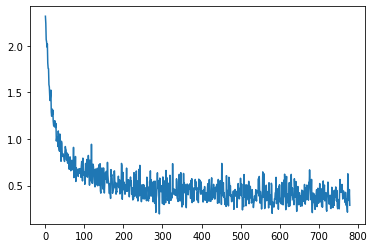

In [21]:
wd = 1e-04
lr = 1e-01
losses = []
logist = MnistLogistic().cuda()
for x, y in data.train_dl:
  losses.append(update(x, y, lr))
print(min(losses))
loss_wd_mapping.update({wd: min(losses)})
plt.plot(losses)

In [30]:
loss_wd_mapping

{0.0001: 0.18917100131511688}

In [45]:
#test
t = nn.Parameter()
# t
for param in logist.parameters():
  break
# print(t)
param.shape
param[0][:30] , t

(tensor([ 0.0069,  0.0168, -0.0040,  0.0101,  0.0203, -0.0098, -0.0290,  0.0308,
         -0.0048,  0.0050,  0.0056, -0.0111, -0.0104,  0.0043, -0.0147, -0.0090,
          0.0055, -0.0140,  0.0066, -0.0214, -0.0218, -0.0026, -0.0084, -0.0264,
         -0.0187,  0.0102, -0.0096, -0.0150, -0.0153, -0.0065], device='cuda:0',
        grad_fn=<SliceBackward>), tensor([[ 0.3456, -0.5075, -0.1957, -1.0611],
         [ 0.7375, -0.0999, -0.6427, -1.7488]]))

In [24]:
#test
class MyLinear(nn.Module):
  def __init__(self, in_features, out_features, bias = False):
    #input shape = (64, 784) -- 64: batch size, 784 is the data which we are using. -- each row is one record of data.... but we want transpose.
    self.weight = torch.randn((in_feature, out_features))

In [40]:
#test
from torch.nn import init
import copy
t_w = torch.randn((2, 5))
tx = copy.deepcopy(t_w)
# t_w;
std = math.sqrt(2/5)
init.kaiming_uniform(t_w, mode = 'fan_in')
tx *= std
tx == t_w
tx, t_w

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: nn.init.kaiming_uniform is now deprecated in favor of nn.init.kaiming_uniform_.
  


(tensor([[-0.1320, -0.2234, -0.1299,  0.4927,  0.2341],
         [ 0.0056,  0.4787,  0.4663,  0.0992, -0.1646]]),
 tensor([[ 0.0515, -0.2776, -0.5309, -0.7662, -1.0467],
         [-0.7095,  0.5962, -0.2192, -0.6390,  0.2140]]))

In [27]:
#test
lin = nn.Linear(784, 10).cuda()
lin.weight.shape
y_hat = lin(x_b)
y_hat.shape

torch.Size([64, 10])

In [21]:
class MyLin(nn.Module):
  def __init__(self, n_in, n_out):
    super().__init__()
    self.weights = nn.Parameter(self.kaiming_uniform(torch.rand((n_in, n_out)), n_in))
    self.bias = nn.Parameter(self.kaiming_uniform(torch.rand((n_out)), n_out))

  def kaiming_uniform(self, weight, n_factor):
    return weight*math.sqrt(2/n_factor)
  
  def forward(self, x_b):
    y_hat = (x_b @ self.weights) + self.bias
    return y_hat

In [33]:
#test
x_b

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [ ]:
#test
lin = MyLin(784, 10).cuda()
params = []
for i in lin.parameters():
  params.append(i)
# params
my_y = lin(x_b)
my_y
# loss = loss_func(my_y, y_b.long())
# loss

In [22]:
class MyLogistic(nn.Module):
  def __init__(self, in_features = 784, out_features = 10):
    super().__init__()
    self.lin = MyLin(in_features, out_features)
  
  def forward(self, x_b):
    return self.lin(x_b)

In [ ]:
#test
lo = MyLogistic(784, 10).cuda()
F.relu(lo(x_b))

In [17]:
loss_wd_mapping = {}

0.1183616891503334


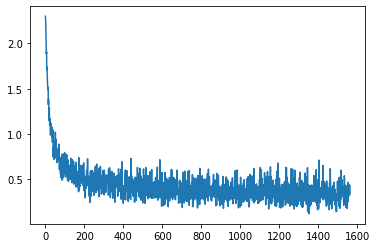

In [18]:
wd = 1e-04
lr = 1e-01
losses = []
logist = MyLogistic(784, 10).cuda()
c = 0
while c <= 1:
  for x, y in data.train_dl:
    losses.append(update(x, y, lr))
  c += 1
print(min(losses))
loss_wd_mapping.update({wd: min(losses)})
plt.plot(losses)

In [19]:
losses[200]

0.4744659662246704

In [23]:
class MultiLogist(nn.Module):
  def __init__(self, in_features, out_features):
    super().__init__()
    self.lin_1 = MyLin(in_features, 50)
    # self.lin_2 = MyLin(200, 50)
    self.lin_2 = MyLin(50, out_features)
  
  def forward(self, x_b):
    return self.lin_2(F.relu(self.lin_1(x_b)))

In [ ]:
#test
multi = MultiLogist(784, 10).cuda()
for i in multi.parameters():
  print(i.shape)
y_pred = multi(x_b)
loss = loss_func(y_pred, y_b.long())
loss

In [ ]:
wd = 1e-04
lr = 1e-01

losses = []
logist = MultiLogist(784, 10).cuda()
c = 0
while c <= 0:
  for x, y in data.train_dl:
    losses.append(update(x, y, lr))
  c += 1
print(min(losses), losses[-1])
loss_wd_mapping.update({wd: min(losses)})
plt.plot(losses)

In [22]:
losses[200]

0.4733506143093109

In [24]:
"""
def update(x, y, lr):

  y_pred = logist(x)
  loss = loss_func(y_pred, y.long())
  w_sum = 0.
  for i in logist.parameters():
    w_sum += (i**2).sum()
  
  loss += w_sum * wd

  loss.backward()
  with torch.no_grad():
    for p in logist.parameters():
      p.sub_(lr * p.grad)
      p.grad.zero_()
  return loss.item()
"""
def update(x, y, lr):

  opt = optim.SGD(logist.parameters(), lr = lr, weight_decay = wd)
  y_pred = logist(x)
  loss = loss_func(y_pred, y.long())
  loss.backward()
  opt.step()
  opt.zero_grad()
  return loss.item()

In [26]:
loss_wd_mapping = {}

0.11076889932155609 0.3250245153903961


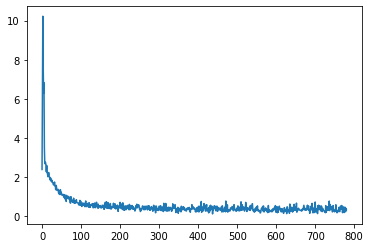

In [27]:
wd = 1e-04
lr = 1e-01

losses = []
logist = MultiLogist(784, 10).cuda()
c = 0
while c <= 0:
  for x, y in data.train_dl:
    losses.append(update(x, y, lr))
  c += 1
print(min(losses), losses[-1])
loss_wd_mapping.update({wd: min(losses)})
plt.plot(losses)

In [28]:
losses[200]

0.7046434283256531

In [27]:
#test
#with momentum
# class MnistMoms(nn.Module):
lin = MyLin(10, 5)
params = []
for i in lin.parameters():
  params.append(i)


In [42]:
#test
a = {params[0]: 'indai'}
a.pop(params[0])


'indai'

In [35]:
from copy import deepcopy

In [24]:

def update_with_momentum(x, y, lr, moms = 0.9):

  y_pred = logist(x)
  loss = loss_func(y_pred, y.long())
  w_sum = 0.
  for i in logist.parameters():
    w_sum += (i**2).sum()
  
  loss += w_sum * wd
  loss.backward()

  with torch.no_grad():
    for p in logist.parameters():
      if not p in prev_grads:
        new_weighted_avg = p.grad
        p.sub_(lr * new_weighted_avg)
        
      else:
        weighted_grad = prev_grads.pop(p)
        new_weighted_avg = (1.0 - moms) *p.grad + moms *weighted_grad
        p.sub_(lr * new_weighted_avg)
      prev_grads.update({p: deepcopy(new_weighted_avg)})
      p.grad.zero_()

  return loss.item()

In [30]:
momentum_mapping = {}

0.16908591985702515 0.568855345249176


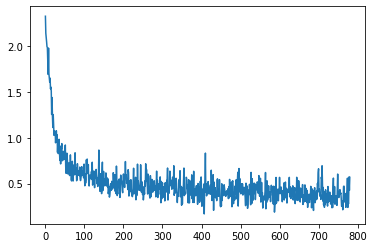

In [31]:
wd = 1e-04
lr = 1e-01
moms = 0.9
losses = []
prev_grads = {}

logist = MyLogistic(784, 10).cuda()
c = 0
while c <= 0:
  for x, y in data.train_dl:
    losses.append(update_with_momentum(x, y, lr, moms))
  c += 1
# print(min(losses))
print(min(losses), losses[-1])
momentum_mapping.update({moms: losses[-1]})
plt.plot(losses)

In [32]:
print(losses[200])

0.6055770516395569


In [23]:
"""
def update_with_momentum(x, y, lr, moms = 0.9):

  y_pred = logist(x)
  loss = loss_func(y_pred, y.long())
  w_sum = 0.
  for i in logist.parameters():
    w_sum += (i**2).sum()
  
  loss += w_sum * wd
  loss.backward()

  with torch.no_grad():
    for p in logist.parameters():
      if not p in prev_grads:
        new_weighted_avg = p.grad
        p.sub_(lr * new_weighted_avg)
        
      else:
        weighted_grad = prev_grads.pop(p)
        new_weighted_avg = (1.0 - moms) *p.grad + moms *weighted_grad
        p.sub_(lr * new_weighted_avg)
      prev_grads.update({p: deepcopy(new_weighted_avg)})
      p.grad.zero_()

  return loss.item()
"""

def update_with_rmse_prop(x, y, lr):
  # st()
  rmse_alpha = 0.9
  e = 1e-09
  y_pred = logist(x)
  loss = loss_func(y_pred, y.long())
  w_sum = 0.
  '''
  for i in logist.parameters():
    w_sum += (i**2).sum()
  '''
  loss += w_sum * wd
  loss.backward()
  
  with torch.no_grad():
    for param in logist.parameters():
      '''
      SGD: param.sub_(lr*param.grad)
      RMSE PROP update = param.sub_(lr * param.grad/squared_average)
      '''
      #RMSE PROP requires squared weighted average of previous gradients of that respective parameter. to store that we use a dict called squared_moving_average
      if param not in squared_moving_average:
        new_squared_average = param.grad**2 + e
        # param.sub_(lr*param.grad/new_squared_average)
      else:
        squared_average = squared_moving_average.pop(param)
        squared_gradient = param.grad**2
        new_squared_average = (1-rmse_alpha) * squared_gradient + rmse_alpha * squared_average
      param.sub_(lr*param.grad/new_squared_average.sqrt())
      squared_moving_average.update({param: deepcopy(new_squared_average)})
      param.grad.zero_()
  return loss.item()


In [34]:
#test
logist = MyLogistic(784, 10).cuda()
lr = 1e-02
# update_with_rmse_prop(x_b, y_b, lr)

In [24]:
momentum_mapping = {}

0.05221719667315483 0.15408819913864136


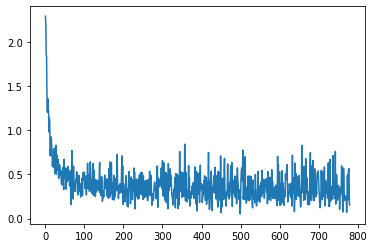

In [25]:
wd = 0.
lr = 1e-02
moms = 0.9
losses = []
squared_moving_average = {}

logist = MyLogistic(784, 10).cuda()
c = 0
while c <= 0:
  for x, y in data.train_dl:
    losses.append(update_with_rmse_prop(x, y, lr))
  c += 1
# print(min(losses))
print(min(losses), losses[-1])
momentum_mapping.update({lr: losses[-1]})
plt.plot(losses)

In [26]:
losses[200]

0.3986862897872925

In [62]:
#test
logist = MyLogistic(784, 10).cuda()
y_hat = logist(x_b)
loss = loss_func(y_hat, y_b.long())
loss.backward()

In [63]:
#test
weights = []
for param in logist.parameters():
  weights.append(param)
  

In [ ]:
#test
weights[0], weights[0].grad, weights[1], weights[1].grad

In [28]:
#test
for a, b in data.train_dl:
  # print(a, b)
  pass  

In [ ]:
#test
lin= MyLin(784, 10).cuda()
lin.weights.shape, lin.bias.shape, x_b.shape, x_b


In [53]:
#test
x = torch.rand((3,3))
x.round()
np.unique(x.round().numpy())
from copy import deepcopy

In [ ]:
#test
y_hat = x_b @ lin.weights
# y_hat, y_hat.shape
# y.long()
loss = loss_func(y_hat, y.long())
print("Loss is: " + str(loss))
loss.backward()
# lin.weights.grad.shape
grad = deepcopy(lin.weights.grad)
np.unique(grad.cpu().numpy())

In [ ]:
#test
lin.weights, lin.weights.shape
y_pred = x_b

In [25]:
def adam_update(x, y, lr, moms):
  rmse_alpha = 0.9
  eps = 1e-09
  y_hat = model(x)
  loss = loss_func(y_hat, y.long())

  w_sum = 0.
  for param in model.parameters():
    w_sum += param.sum()**2
  loss += wd*w_sum

  loss.backward()

  with torch.no_grad():
    for param in model.parameters():
      """
      calculate the update first by using rmse prop
      apply momentum on the update calculated
      """
      #1. calculating update using rmse prop
      if param not in squared_averages:
        new_squared_avg = param.grad**2 + eps
      else:
        new_squared_avg = (1-rmse_alpha)*(param.grad**2) + rmse_alpha*squared_averages.pop(param)
      
      update = lr*(param.grad/new_squared_avg.sqrt())
    
      #2. Applying momentum to the update
      if param not in prev_update:
        update_with_momentum = update
      else:
        update_with_momentum = (1 - moms)*update + moms*prev_update.pop(param)
      
      param.sub_(update_with_momentum)
      prev_update[param] = deepcopy(update_with_momentum)
      squared_averages.update({param: deepcopy(new_squared_avg)})
      param.grad.zero_()
  return loss.item()


0.05346132814884186 0.09524013102054596


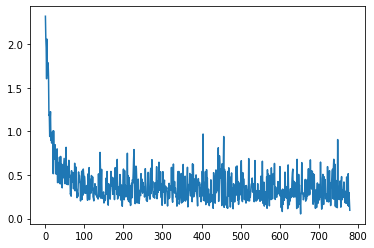

In [46]:
wd = 0.
lr = 1e-02
moms = 0.9
losses = []
squared_averages = {}
prev_update = {}

model = MyLogistic(784, 10).cuda()
c = 0
while c <= 0:
  for x, y in data.train_dl:
    losses.append(adam_update(x, y, lr, moms))
  c += 1
# print(min(losses))
print(min(losses), losses[-1])
momentum_mapping.update({lr: losses[-1]})
plt.plot(losses)

In [20]:
def update_using_optim(x, y, lr, moms):
  optimizer = optim.SGD(model.parameters(), lr = lr, momentum=moms, weight_decay=1e-04)
  y_hat = model(x)
  loss = loss_func(y_hat, y.long())
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()
  return loss.item()

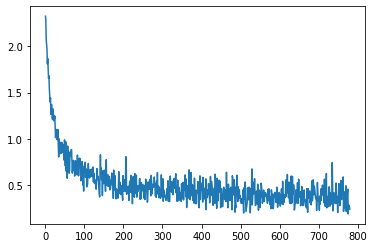

In [21]:
lr = 1e-01
moms = 0.9
losses = []
model = MyLogistic(784, 10).cuda()
for x, y in data.train_dl:
  losses.append(update_using_optim(x, y, lr, moms))
plt.plot(losses)


In [22]:
def update_adam_optim(x, y, lr, moms):
  optimizer = optim.Adam(model.parameters(), lr = lr, weight_decay = wd)
  y_hat = model(x)
  loss = loss_func(y_hat, y.long())
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()
  return loss.item()

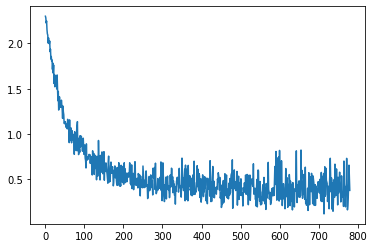

In [28]:
lr = 1e-03
moms = 0.9
losses = []
wd = 0.0
model = MyLogistic(784, 10).cuda()
for x, y in data.train_dl:
  losses.append(update_adam_optim(x, y, lr, moms))
plt.plot(losses)

In [30]:
x_b, y_b

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0'),
 tensor([9, 1, 6, 6, 0, 5, 6, 3, 0, 4, 3, 5, 2, 5, 0, 0, 7, 0, 3, 9, 1, 0, 8, 3,
         7, 3, 4, 3, 7, 5, 3, 8, 2, 5, 4, 9, 5, 6, 8, 5, 6, 1, 4, 0, 6, 2, 1, 5,
         6, 9, 3, 6, 2, 2, 0, 9, 8, 0, 2, 4, 5, 2, 4, 4], device='cuda:0'))

In [26]:
learn = Learner(data, MyLogistic(), loss_func=loss_func, metrics = accuracy)

In [27]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


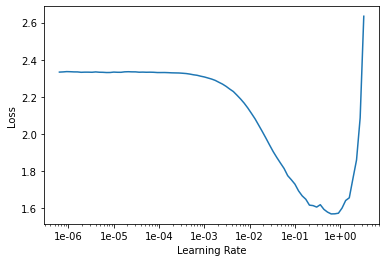

In [28]:
learn.recorder.plot()

In [33]:
#test -- softmax
lin = MyLin(784, 10).cuda()
y_hat = lin(x_b)
y_hat.shape, y_hat[0]

(torch.Size([64, 10]),
 tensor([2.4385, 2.5124, 2.5791, 2.4310, 2.5957, 2.7360, 2.4508, 2.4075, 2.4747,
         2.2481], device='cuda:0', grad_fn=<SelectBackward>))

In [37]:
test = torch.exp(y_hat[0])/torch.exp(y_hat[0]).sum()
test.sum(), test

(tensor(1., device='cuda:0', grad_fn=<SumBackward0>),
 tensor([0.0945, 0.1017, 0.1088, 0.0938, 0.1106, 0.1272, 0.0957, 0.0916, 0.0980,
         0.0781], device='cuda:0', grad_fn=<DivBackward0>))

In [39]:
y_hat.shape[0]

64

In [41]:
for i in range (y_hat.shape[0]):
  y_hat[i] = torch.exp(y_hat[i])/torch.exp(y_hat[i]).sum()

{0.9999998807907104, 0.9999999403953552, 1.0, 1.0000001192092896}